### Introduction to regression with neural networks in Tensorflow
There are many definitions for a regression problem
but in our case, we're going to simplify it: predicting a Numerical variable
based on some combination of variables, even shorter...predicting a number.


In [3]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)


2.8.2


### Create data to view and fit

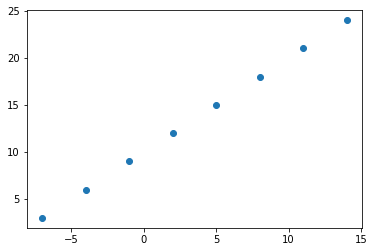

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it with a plotb
plt.scatter(X, y)

In [5]:
# This is the relationship between our independant variable and dependant variable.
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes important 

In [6]:
# Create a demo tensor for our Housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Change the dtype to tf.float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

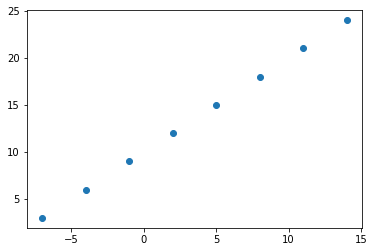

In [13]:
plt.scatter(X, y)

### Steps in modeling with TensorFlow
1. ***Creating a model*** and the find the input and output layers, as well as the hidden layers of
    a deep learning model.

2. ***Compiling a model*** - define the loss function (in other words, the function 
    which tells our model how wrong it is) and the optimizer (tells are model how to improve 
    the patterns it's learning) and  evaluation metrics (What we can use to interpret 
    the Performance of our model.)
    
3. ***Fitting a model*** – leading the model try to find patterns between X & y (features and labels)

In [14]:
# Set random seed
tf.random.set_seed(42)

# First Neural model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sdg is short for stochasitc gradient descent 
              metrics=["mae"])
# 3. Fit the model, epochs is the number of times it goes through the data
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 768ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
# Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [17]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [18]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, 
increase the number of hidden units (all called neurons) within each of the hidden layers, 
change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model with more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(1),                  
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sdg is short for stochasitc gradient descent 
              metrics=["mae"])

# 3 Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 284ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [20]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict([17.0])


array([[29.739855]], dtype=float32)

In [22]:
# Practice creating a model, homework if you will

# 1. Create the model, the "Dense" number is the number of hidden units e.g. Dense(100)
model = tf.keras.Sequential([
        tf.keras.layers.Input(1),
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])
# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 431ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.46

In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
model.predict([17])

array([[26.58353]], dtype=float32)

### Evaluating a model
In practice, a typical workflow you'll go through when building neural network is:
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
tweak a model -> fit it -> evaluate it

In [25]:
# When it come to evaluation there are 3 words to remember:
# Visualize, Visualize, Visualize
# It's good to visualize the data what data are we working with what does it look like
# Visualize the model itself - what does our model look like?
# the training of the model - how does a model perform while it learns?
# The predictions of a model – how does the predictions of a model lineup against,
# the ground truth (the original labels).

In [26]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [27]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

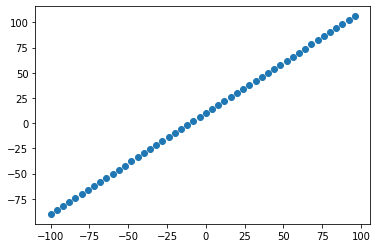

In [28]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available, This is like the course materials for a class e.g. book for the class

* Validation set - the model gets tuned on this data, which is typically 10-15% od the data available this is like the practice exam for a course for class

* Test set - the model get evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available this is like the final exam for a course or class.

In [29]:
# Check the length of the number of samples we have
len(X)

50

In [30]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]


X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now that we've got our data in training and test sets… let's visualize it again!

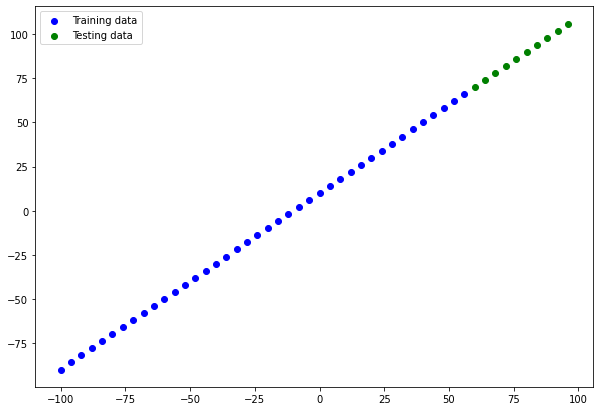

In [31]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to 
                                                         # predict this (given X, what's y?)
# Show a legend
plt.legend();

# Visualizing your data makes it easier to understand than looking at a python list of numbers

In [32]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Input(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
X[0].shape

TensorShape([])

In [35]:
# Let's create a model which builds automatically by defining the input underscore shape
# argument in the first layer.

tf.random.set_seed(42)

# Create a model like before, and add a name to the layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit the model


In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated During training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** for more in-depth overview of the Trainable parameters within a layer, check out
     MIT's Introduction to deep learning video.
     
**Execise** Try playing around the number of hidden units in the Dense layer

In [37]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [38]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


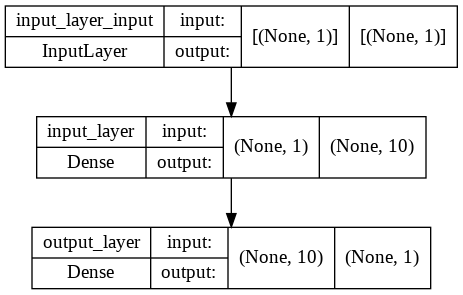

In [39]:
# Visualizing our model with the below
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model's predictions)

In [40]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [42]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

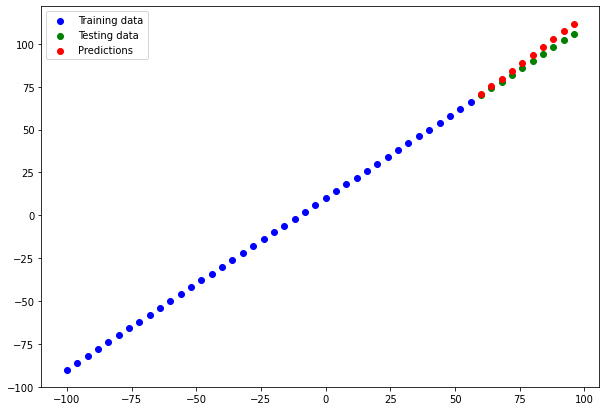

In [43]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics. 

Depending on the problem I'm working on, there will be different evaluation metrics to evaluate my model's performance.

Since I'm working on a regression problem, two of the main metrics that I'll see are:

* MAE - mean absolute error, "On average, how wrong is each of the model's predictions."

* MSE - mean square error, "square the average errors"

In [44]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 157ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [45]:
# calculate the mean absolute error
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.constant(y_pred))


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
# squeezing makes sensors into one single dimension, it's good for reshaping tensors to fit one another.
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [49]:
# calculating the mean absolute error after squeezing the y_pred so that now y_test 
# and y_pred are in the exact same shape.
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [50]:
# Calculate Mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [51]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) – this might come in the form of more layers or more hitting units in each layer.
Make your model larger (using a more complex model) – this might come in the form of more layers or more hitting units in each layer.

3. Train for longer – give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs.

2. 'model_2' - 2 layers, trained for 100 epochs

3. 'model_3' - 2 layers, trained for 500 epochs

** Build model_1

In [52]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(1,),
  tf.keras.layers.Dense(15,),
  tf.keras.layers.Dense(1)

])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])


# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 19.8832 - mae: 19.8832
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.4547 - mae: 21.4547
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4380 - mae: 27.4380
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 28.1011 - mae: 28.1011
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 13.6896 - mae: 13.6896
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9970 - mae: 10.9970
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9805 - mae: 11.9805
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8279 - mae: 10.8279
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 37.2562 - mae: 37.2562
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 24.9613 - mae: 24.9613
Epoch 11/100
2/2 [==============================] - 0s 4ms/

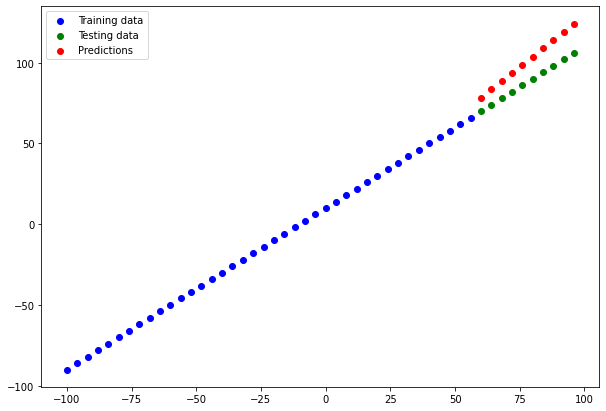

In [53]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [54]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [55]:
# Calculate model_1 evaluation metrics, how much in error is it from the target
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.256399>,
 <tf.Tensor: shape=(), dtype=float32, numpy=185.73537>)

***Build 'model_2'***

* 2 dense layers, trained for 100 epochs

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Input(1),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])                       


# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [=========================

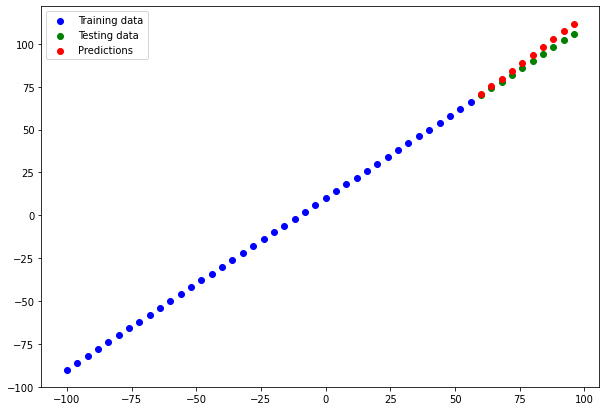

In [57]:
# Plotting the results and making predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [58]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [59]:
# Build model_3 epochs 500, 2 Dense layers

# 1. Create random seed
tf.random.set_seed(42)

# 2. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 4. Fit the model
model_3.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 

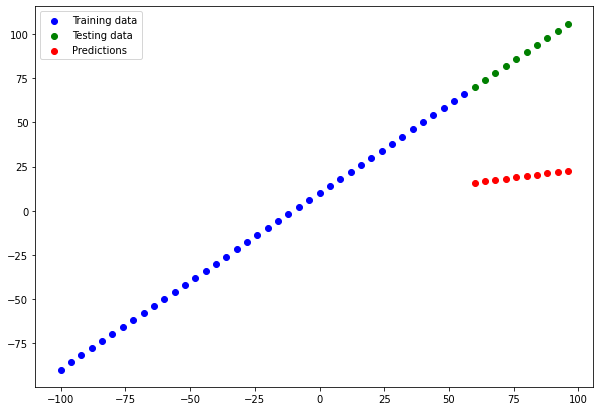

In [60]:
# Plot the model, predict, may have been training for too long instead of a sweet spot, overfitting
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

I ran a few experiments, let's compare the results.

**Note:** You want to start with small models/experiments and make sure they work and then increase their scale when necessary.

In [62]:
# Let's compare our model's results using a pandas DataFrame which is a table

# Import Pandas
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_2.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,13.256399,13.070143
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [63]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note** One of my main goals should be to minimize the time between running models/experiments. The the more experiments you do, the more things you'll figure out which don't work and in turn figure out what does work. Remember machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And doing so, it can be tedious if you're running lots of experiments.

Luckly, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modeling experiments (we'll see this one later.)

* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into Tensorboard.)

###Saving our models###

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web application or mobile application.

There are two main form that we can save our models two:
There are two main form that we can save our models to:
1. The SavedModel format

2. The HDF5 format

In [64]:
# Save model to the SaveModel format
model_2.save("best_model_SaveModel_format")


INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [65]:
# Save model to HDF5 format
model_2.save("best_model_SaveModelHDF5_format.h5")

###Loading in a saved model

In [66]:
# Load a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_2.summary() # Same as the SavedModel

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [76]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_SaveModelHDF5_format.h5")
loaded_h5_model.summary() == model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

True

In [78]:
# Check to see if loaded .h5 has the same predictions as loaded_h5
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# 